In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/legoses/Library/CloudStorage/GoogleDrive-nelsonla@byui.edu/My Drive/Lance/PH135/textbook/chapters':
  os.chdir(r'/Users/legoses/Library/CloudStorage/GoogleDrive-nelsonla@byui.edu/My Drive/Lance/PH135/textbook/chapters')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1696254354.0, "/opt/homebrew/Cellar/python@3.11/3.11.6/Frameworks/Python.

/var/folders/l7/qksjftz12pz0s32y0l3jd4k4cyyb65/T/ipykernel_11273/4212331884.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


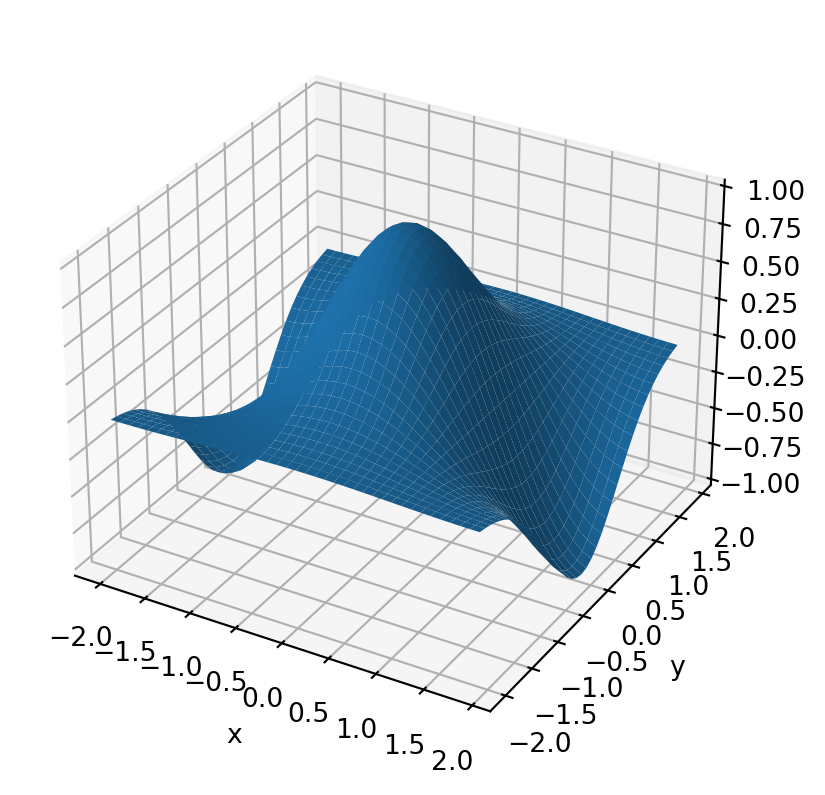

In [2]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  #<- You need this to make 3D plots
# Define the arrays x and y
# Don't make the step size too small or you will kill the
# system (you have a large, but finite amount of memory)
x=arange(-2,2,0.1)
y=arange(-2,2,0.1)
# Use meshgrid to convert these 1-d arrays into 2-d matrices
# of x and y values over the plane
X,Y=meshgrid(x,y)
#X,Y=mgrid[-1:1:0.1,0:1.5:0.1]  # You could also do this in place of meshgrid
# Get F(x,y) by using F(X,Y).
# rather than with x and y
F=cos(pi/2*X)*exp(-Y**2)
# Plot the function
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,F)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#| eval: false
ax=pyplot.axes(projection='3d')  # Set the axes to be 3 dimensional

In [4]:
from numpy import meshgrid
x = [1,2,3]
y = [4,5]

X,Y = meshgrid(x,y)
print(X)
print(Y)

[[1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]]


In [5]:
from numpy import mgrid

X,Y = mgrid[1:4,4:6]
print(X)
print(Y)


X,Y = mgrid[1:4:0.5,4:6:0.5]  
print(X)
print(Y)


X,Y = mgrid[1:4:10j,4:6:10j] 
print(X)
print(Y)

[[1 1]
 [2 2]
 [3 3]]
[[4 5]
 [4 5]
 [4 5]]
[[1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5]
 [2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5]
 [3.  3.  3.  3. ]
 [3.5 3.5 3.5 3.5]]
[[4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
  1.33333333 1.33333333 1.33333333 1.33333333]
 [1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
  1.66666667 1.66666667 1.66666667 1.66666667]
 [2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.        ]
 [2.33333333 2.33333333 2.33333333 2.33333333 2.33333333 2.33333333
  2.33333333 2.33333333 2.33333333 2.33333333]
 [2.66666667 2.66666667 2.66666667 2.66666667 2.66666667 2.66666667
  2.66666667 2.66666667 2.66666667 2.66666667]
 [3.         3.         3.         3.         3.    

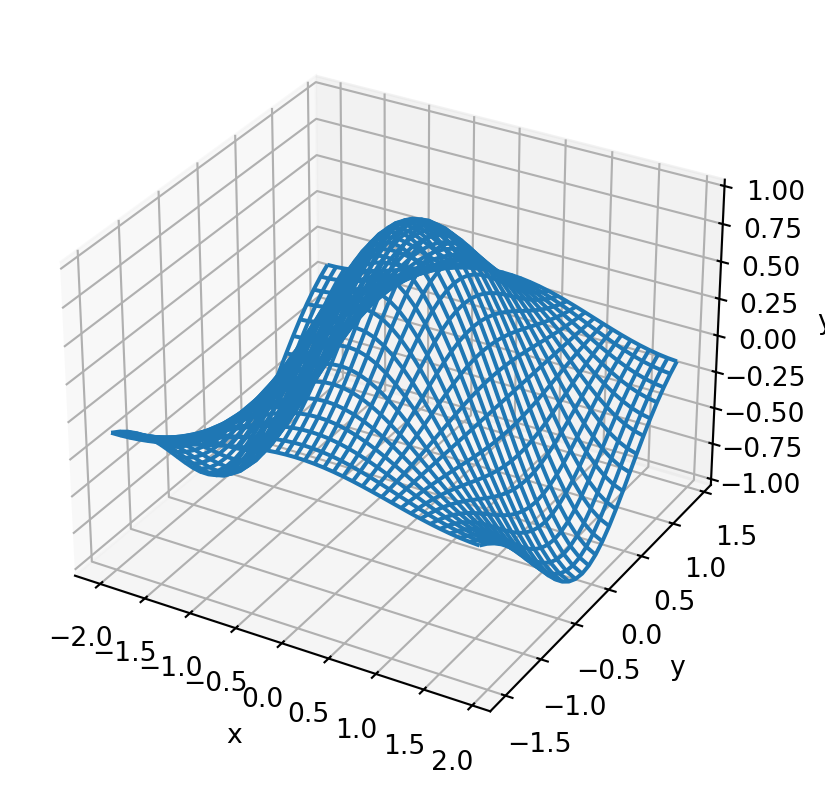

In [6]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot as plt

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,F)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('y')
plt.show()

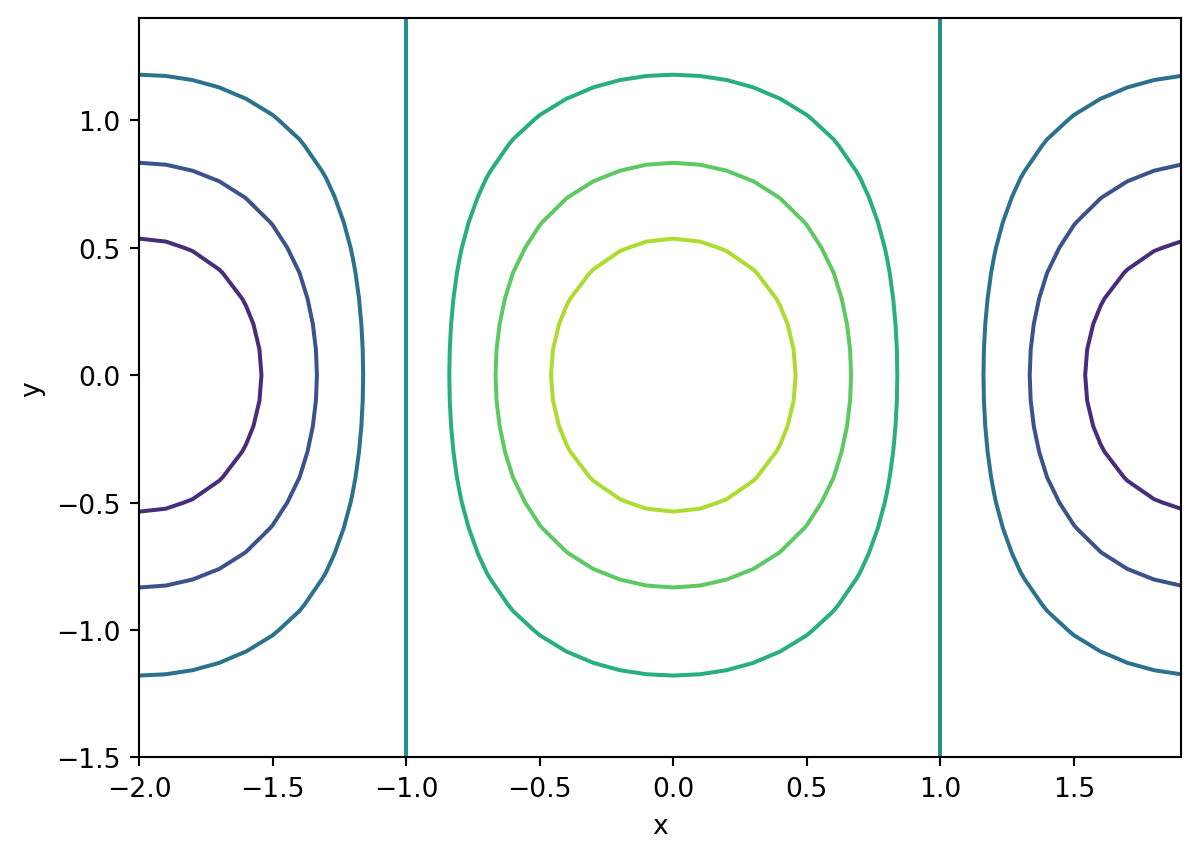

In [7]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot as plt

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=plt.axes()
ax.contour(X,Y,F)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

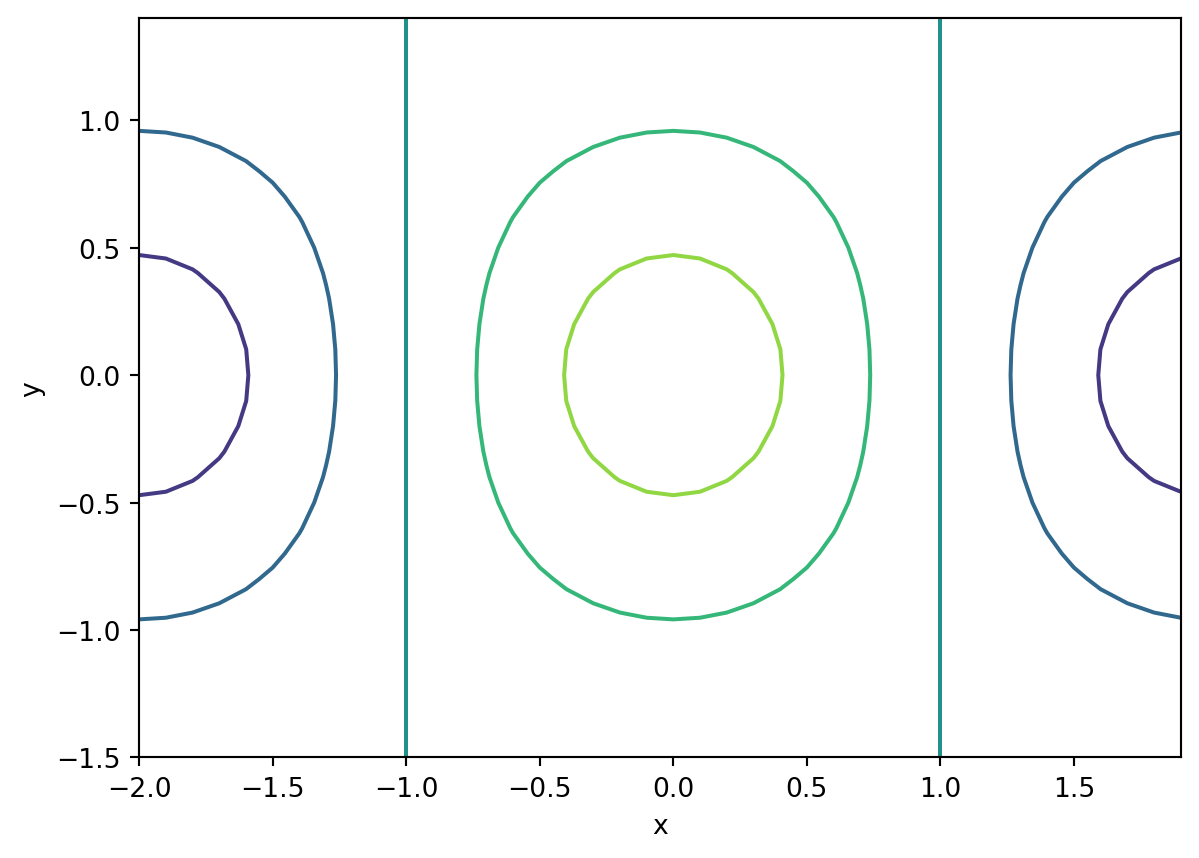

In [8]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot as plt

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=plt.axes()
ax.contour(X,Y,F,levels = 5)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

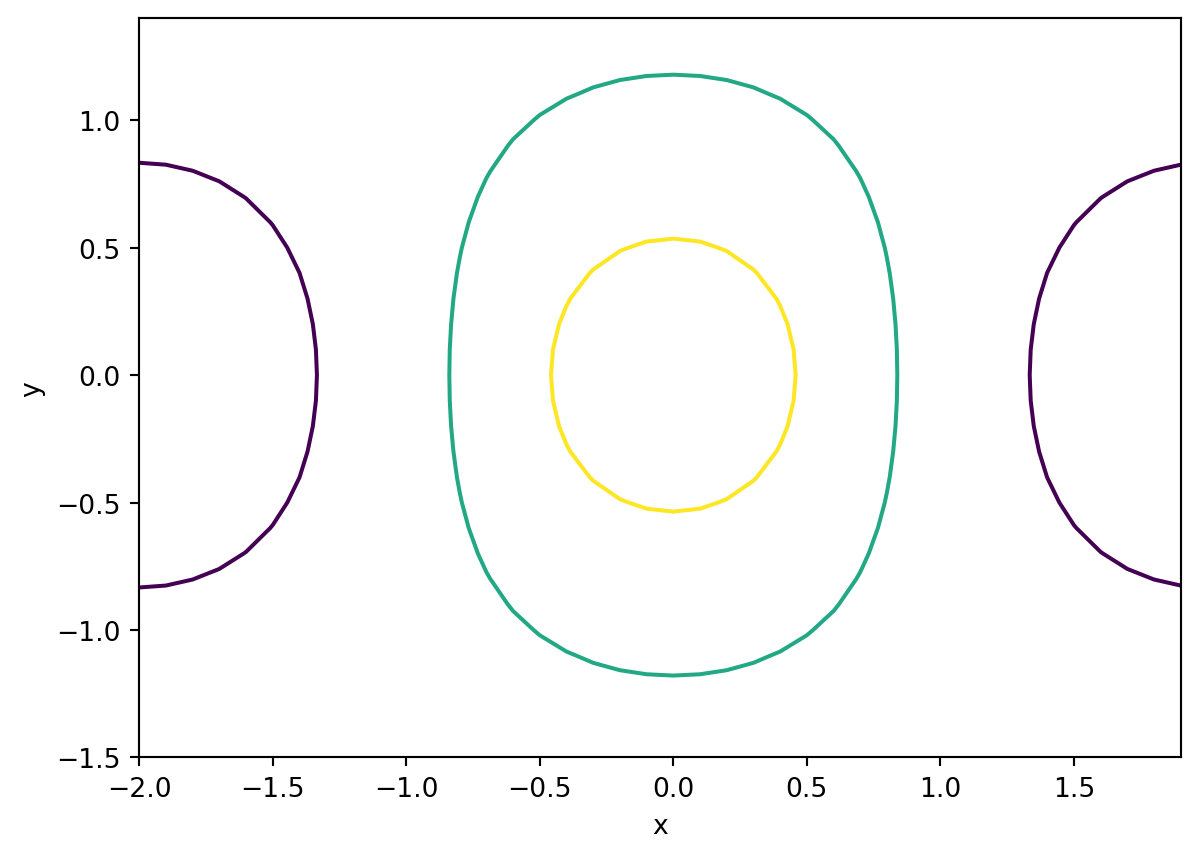

In [9]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=plt.axes()
ax.contour(X,Y,F,levels = [-0.5,0.25,0.75])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

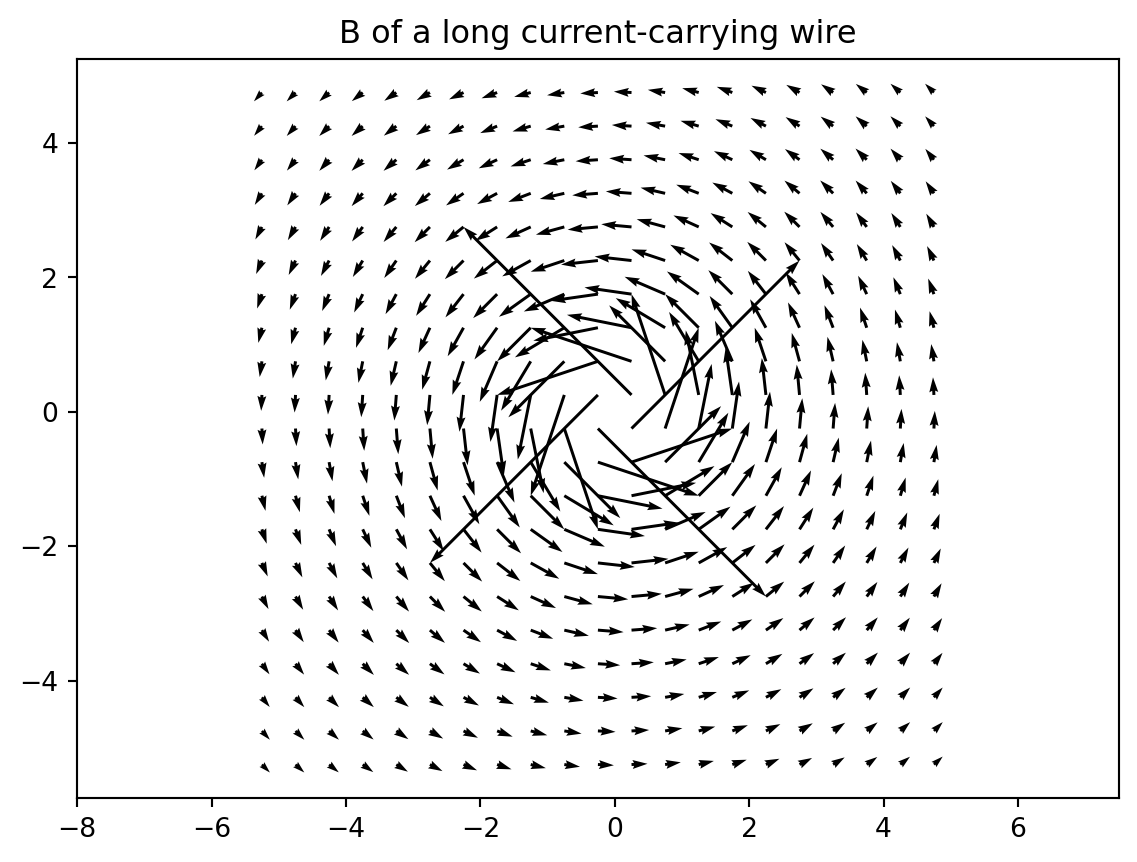

In [10]:
from numpy import arange, meshgrid,sqrt,log
from matplotlib import pyplot
x = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
y = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
X,Y=meshgrid(x,y)

# Magnetic field of a long current-carrying wire
Bx=-Y/(X**2+Y**2)
By=X/(X**2+Y**2)
# make the field arrow plot
pyplot.figure()
pyplot.quiver(X,Y,Bx,By)
pyplot.axis('equal')  # make the x and y axes be equally scaled
pyplot.title('B of a long current-carrying wire')
pyplot.show()


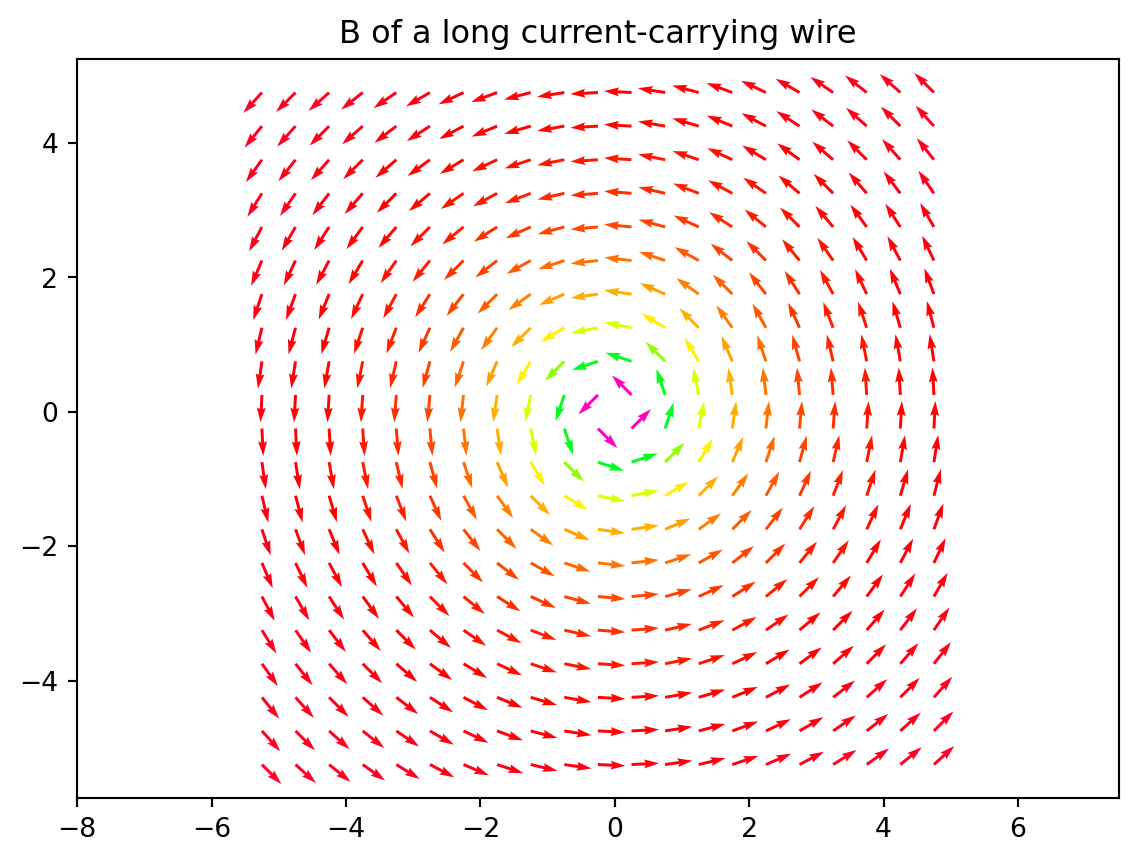

In [11]:
from numpy import arange, meshgrid,sqrt,log
from matplotlib import pyplot
x = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
y = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
X,Y=meshgrid(x,y)

# Magnetic field of a long current-carrying wire
Bx=-Y/(X**2+Y**2)
By=X/(X**2+Y**2)
B = sqrt(Bx**2 + By**2)  # Find the magnitude of the vectors.
# make the field arrow plot
pyplot.figure()
pyplot.quiver(X,Y,Bx/B,By/B,B,cmap="gist_rainbow")  # Divide by magnitude to make them equal to 1
pyplot.axis('equal')  # make the x and y axes be equally scaled
pyplot.title('B of a long current-carrying wire')
pyplot.show()


In [12]:
#| eval: false
#| 
from numpy import arange,sin,cos
from matplotlib import pyplot as plt
%matplotlib

t=0
x = arange(0,5,0.01) #Domain over which I want to plot the function.
while t < 10:
    y=sin(5*x-3*t)*cos(2*x) #Constructarrayoffunction
                                         # values at current time.
    pyplot.clf()  # Clear the canvas, otherwise all plots end up on
                  # top of each other
    pyplot.plot(x,y,'r-',linewidth=3)
    pyplot.xlabel('x')
    pyplot.ylabel('f(x)')
    pyplot.title('t = {:.4f}'.format(t))
    pyplot.draw()
    pyplot.pause(0.01)
    t += .1
# draw the plot, but don't wait for
# someone to close the window.
# Wait before plotting the next one.
# Advance time.

In [13]:
# Python code here

In [14]:
# Python code here

In [15]:
# Python code here

In [16]:
# Python code here